## Top 5 Countries — Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Importing files to JupiterNotebook
order_details = pd.read_csv("order_details.csv")
orders = pd.read_csv("orders.csv")


In [40]:
#Calculate top 5 countries as per Sales

In [41]:
order_details.head()

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [42]:
orders.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [43]:
ship_region = orders [["ship_country","order_id"]]

In [44]:
df = pd.merge (order_details,ship_region, on='order_id', how='inner')

In [45]:
#Calculate Sales

In [46]:
df["sales"] = df["quantity"] * df["unit_price"]

In [47]:
#Group by Ship_country

In [48]:
sales_by_country = df.groupby ("ship_country").agg(
    total_sales = ("sales","sum"), 
    total_orders = ("order_id", "nunique")
).reset_index()

print(sales_by_country)

   ship_country  total_sales  total_orders
0     Argentina      8119.10            16
1       Austria    139496.63            40
2       Belgium     35134.98            19
3        Brazil    114968.48            83
4        Canada     55334.10            30
5       Denmark     34782.25            18
6       Finland     19778.45            22
7        France     85498.76            77
8       Germany    244640.63           122
9       Ireland     57317.39            19
10        Italy     16705.15            28
11       Mexico     24073.45            28
12       Norway      5735.15             6
13       Poland      3531.95             7
14     Portugal     12468.65            13
15        Spain     19431.89            23
16       Sweden     59523.70            37
17  Switzerland     32919.50            18
18           UK     60616.51            56
19          USA    263566.98           122
20    Venezuela     60814.89            46


In [49]:
sales_top = sales_by_country.sort_values("total_sales", ascending=False).head(5)
sales_top

,ship_country,total_sales,total_orders
19,USA,263566.98,122
8,Germany,244640.63,122
1,Austria,139496.63,40
3,Brazil,114968.48,83
7,France,85498.76,77


/var/folders/v0/33sslsb12pj66r9jd7w9cg9h0000gn/T/ipykernel_72903/81747765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


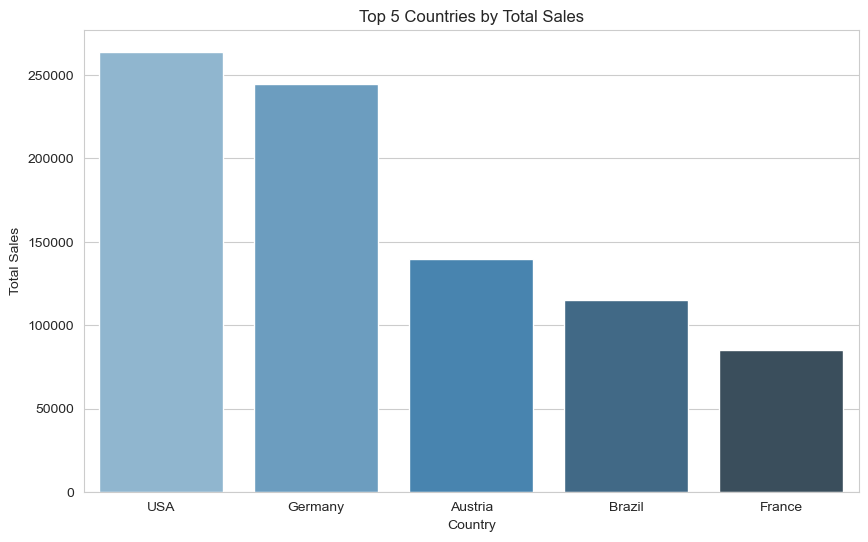

In [50]:
#Visualizing top - 5 Sales as per Country
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    data=sales_top,
    x='ship_country',
    y='total_sales',
    palette="Blues_d"
)
plt.title("Top 5 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()